# mnist 데이터로 mlp 분류작업하기

In [ ]:
from sklearn.datasets import fetch_openml

# 데이터 로드
dataset = fetch_openml("mnist_784", parser="auto")

In [ ]:
import numpy as np
import torch

# dataset 설정
X = torch.tensor(dataset.data.to_numpy(np.float32))
y = torch.tensor(dataset.target.to_numpy(np.int64))

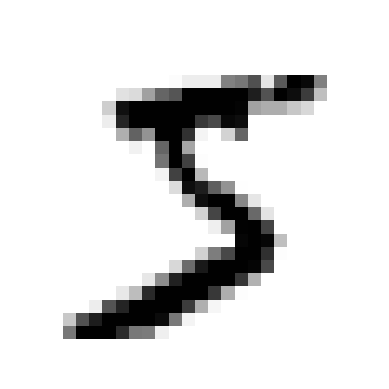

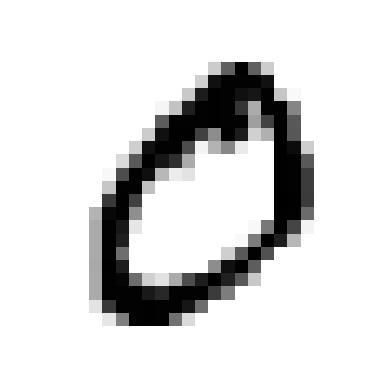

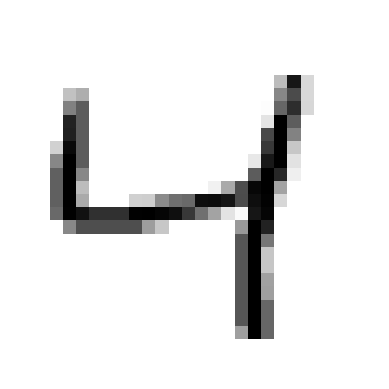

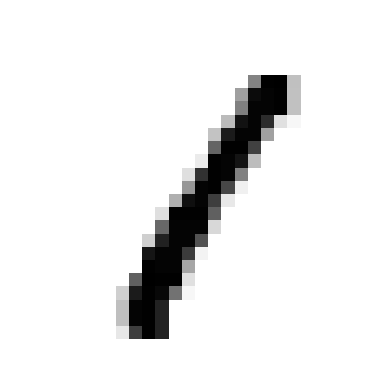

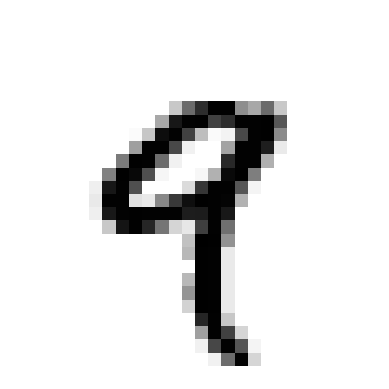

In [3]:
import matplotlib.pyplot as plt

for i in range(5):
    image = X[i].reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


# MLP 정의
class MLP(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.fc1 = nn.Linear(784, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [5]:
model = MLP(1000)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [6]:
def train(model, optimizer, criterion):
    for epoch in range(100):
        y_pred = model(X)

        loss = criterion(y_pred, y)
        print(f"Epoch: {epoch} / Loss: {loss}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


train(model, optimizer, criterion)

Epoch: 0 / Loss: 37.810340881347656
Epoch: 1 / Loss: 1341.3162841796875
Epoch: 2 / Loss: 402.6751708984375
Epoch: 3 / Loss: 28.600543975830078
Epoch: 4 / Loss: 8.4552640914917
Epoch: 5 / Loss: 27.37769889831543
Epoch: 6 / Loss: 10.158656120300293
Epoch: 7 / Loss: 9.263307571411133
Epoch: 8 / Loss: 10.467202186584473
Epoch: 9 / Loss: 5.496936321258545
Epoch: 10 / Loss: 1.414085030555725
Epoch: 11 / Loss: 1.1956595182418823
Epoch: 12 / Loss: 1.0850303173065186
Epoch: 13 / Loss: 1.0009472370147705
Epoch: 14 / Loss: 0.922315239906311
Epoch: 15 / Loss: 0.853495717048645
Epoch: 16 / Loss: 0.7941216230392456
Epoch: 17 / Loss: 0.7463091015815735
Epoch: 18 / Loss: 0.7150869965553284
Epoch: 19 / Loss: 0.7037603259086609
Epoch: 20 / Loss: 0.7805390357971191
Epoch: 21 / Loss: 0.7533309459686279
Epoch: 22 / Loss: 0.6944159269332886
Epoch: 23 / Loss: 0.6319092512130737
Epoch: 24 / Loss: 0.598166823387146
Epoch: 25 / Loss: 0.558269739151001
Epoch: 26 / Loss: 0.559453547000885
Epoch: 27 / Loss: 0.5446

In [7]:
y_pred = model(X[:5])
y_pred.shape

torch.Size([5, 10])

In [8]:
y_pred.argmax(1)

tensor([5, 0, 4, 1, 9])